In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import ScalarFormatter, FuncFormatter

In [2]:
df = pd.read_csv(r'/Users/jesslyngabriella/Desktop/Sales.csv')

In [3]:
df

,Date,Time,State,Group,Unit,Sales
0,01-Oct-20,Morning,WA,Kids,8,20000
1,01-Oct-20,Morning,WA,Men,8,20000
2,01-Oct-20,Morning,WA,Women,4,10000
3,01-Oct-20,Morning,WA,Seniors,15,37500
4,01-Oct-20,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-20,Afternoon,TX,Seniors,14,35000
7556,30-Dec-20,Evening,TX,Kids,15,37500
7557,30-Dec-20,Evening,TX,Men,15,37500
7558,30-Dec-20,Evening,TX,Women,11,27500


In [4]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [5]:
df.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

In [6]:
df_dataonly = df[['Unit', 'Sales']]

In [7]:
df_dataonly

,Unit,Sales
0,8,20000
1,8,20000
2,4,10000
3,15,37500
4,3,7500
...,...,...
7555,14,35000
7556,15,37500
7557,15,37500
7558,11,27500


In [8]:
normalize = MinMaxScaler()

In [9]:
normalize_data = normalize.fit_transform(df_dataonly)

In [10]:
normalize_data

array([[0.0952381 , 0.0952381 ],
       [0.0952381 , 0.0952381 ],
       [0.03174603, 0.03174603],
       ...,
       [0.20634921, 0.20634921],
       [0.14285714, 0.14285714],
       [0.17460317, 0.17460317]])

In [12]:
print(normalize_data.min())
print(normalize_data.max())

0.0
1.0


In [42]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
daily_total = df.groupby('Date')[['Unit', 'Sales']].sum().reset_index().sort_values(by='Date')

In [43]:
daily_total

,Date,Unit,Sales
0,2020-10-01,1488,3720000
1,2020-10-02,1486,3715000
2,2020-10-03,1556,3890000
3,2020-10-04,1488,3720000
4,2020-10-05,1545,3862500
...,...,...,...
85,2020-12-26,1886,4715000
86,2020-12-27,1855,4637500
87,2020-12-28,1838,4595000
88,2020-12-29,1843,4607500


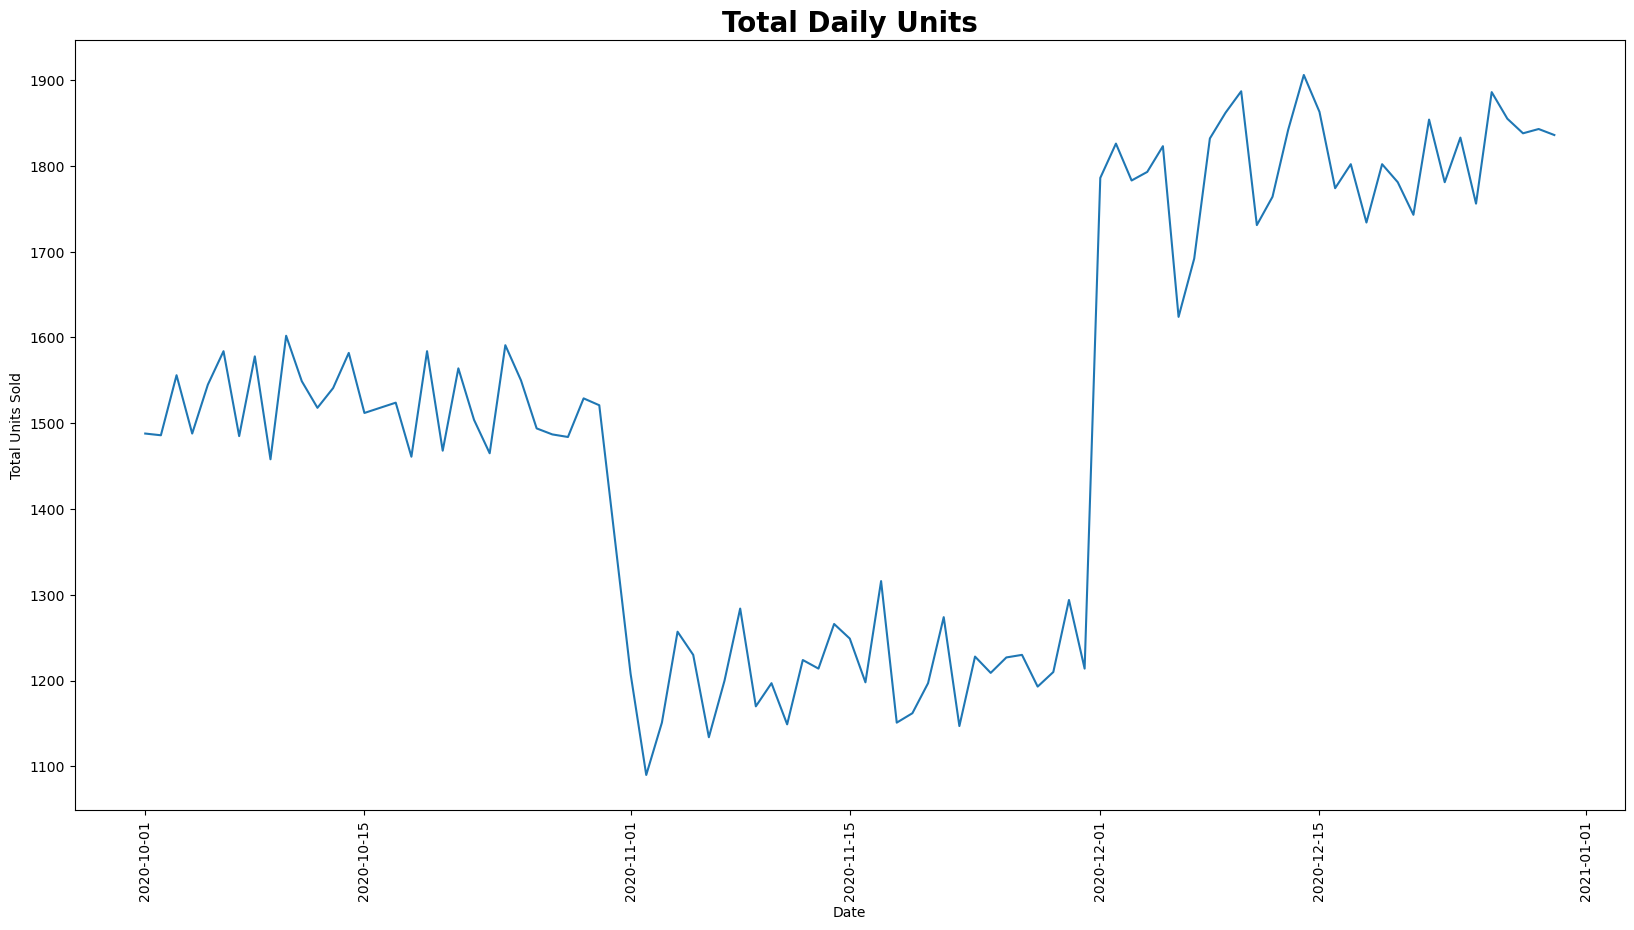

In [44]:
plt.figure(figsize=(20, 10))
plt.plot(daily_total['Date'], daily_total['Unit'])
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.title('Total Daily Units', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

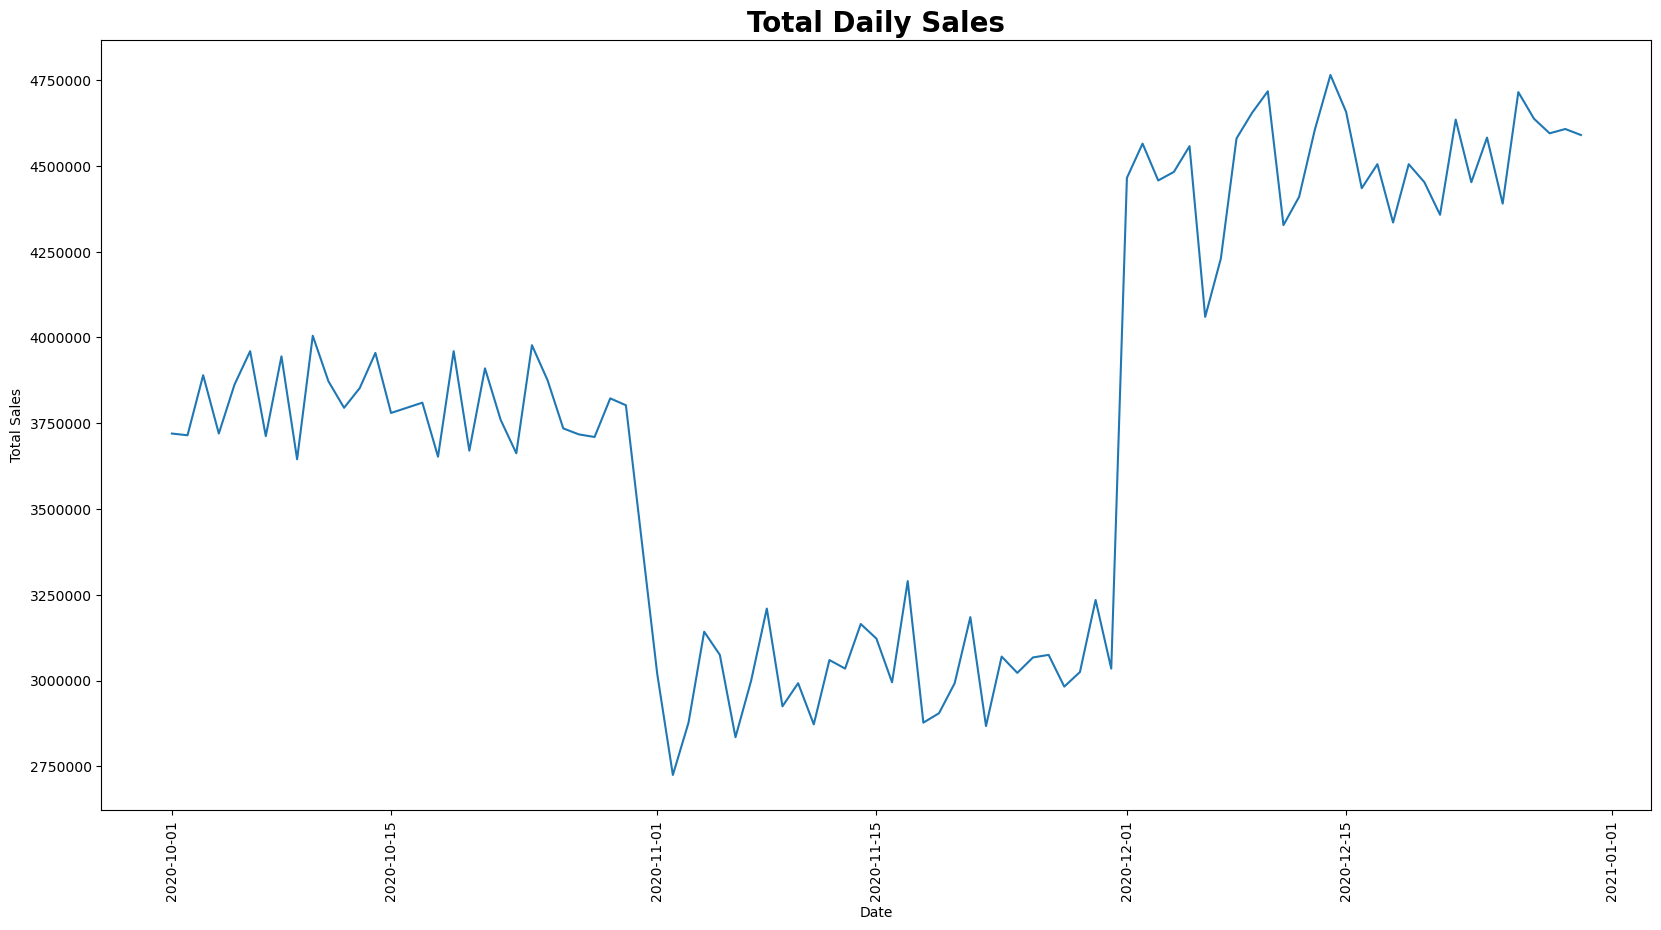

In [120]:
plt.figure(figsize=(20, 10))
plt.plot(daily_total['Date'], daily_total['Sales'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Daily Sales', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.gca().ticklabel_format(style='plain', axis='y')
plt.show()

In [78]:
df['Month'] = df['Date'].dt.month
monthly_desc_stat = df.groupby('Month')[['Unit', 'Sales']].describe()
monthly_desc_stat

Unit                                                      Sales  \
        count       mean        std  min   25%   50%   75%   max   count   
Month                                                                      
10     2520.0  18.141270  11.944521  3.0   9.0  14.0  27.0  50.0  2520.0   
11     2520.0  14.394048  10.946470  2.0   6.0  10.0  22.0  45.0  2520.0   
12     2520.0  21.480952  14.554181  5.0  10.0  15.0  31.0  65.0  2520.0   

                                                                       \
               mean           std      min      25%      50%      75%   
Month                                                                   
10     45353.174603  29861.302213   7500.0  22500.0  35000.0  67500.0   
11     35985.119048  27366.175823   5000.0  15000.0  25000.0  55000.0   
12     53702.380952  36385.451298  12500.0  25000.0  37500.0  77500.0   

                 
            max  
Month            
10     125000.0  
11     112500.0  
12     162500.0

In [123]:
monthly_unit = df.groupby('Month')['Unit'].sum().reset_index()
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
print(monthly_unit)
print(monthly_sales)

   Month   Unit
0     10  45716
1     11  36273
2     12  54132
   Month      Sales
0     10  114290000
1     11   90682500
2     12  135330000


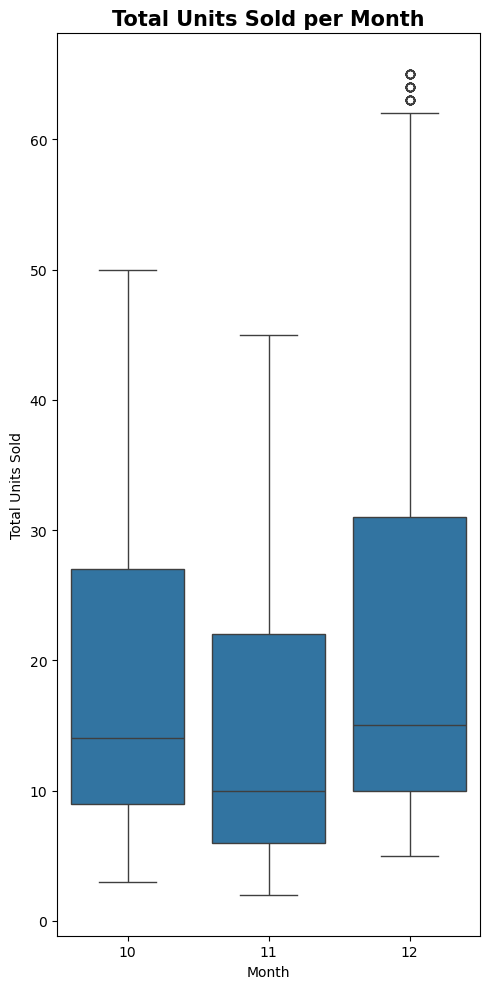

In [121]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=df, x='Month', y='Unit')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold per Month', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

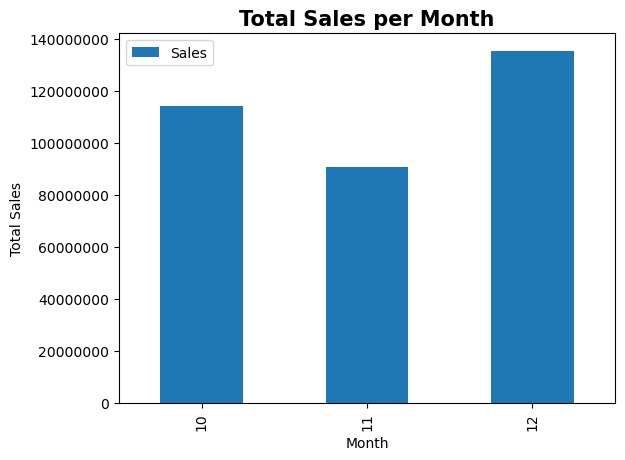

In [122]:
monthly_sales.plot(kind='bar', x='Month', y='Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month', fontsize=15, fontweight='bold')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.gca().ticklabel_format(style='plain', axis='y')
plt.show()

In [125]:
total_units = df['Unit'].sum()
total_sales = df['Sales'].sum()
print(total_units)
print(total_sales)

136121
340302500


Overall Units Sold = 136,121
Overal Sales = 340,302,500

Total Units Sold per Month:
October = 45,716
November = 36,273
December = 54,132

Total Sales per Month:
October = 114,290,000
November = 90,682,500
December = 135,330,000